# Random Forests Training

Example file showing random forest implementation for our data set

## Classifier training and testing

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, matthews_corrcoef, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.utils import shuffle
from sklearn import preprocessing

import immas
from immas import MammogramImage
from immas import get_img_features
from immas.basic_functions import show_image_plt
from immas import get_dataset_features

%matplotlib inline

In [2]:
# Import the data
data = pd.read_csv("feature-tables/train-data_1526424532.csv")
data.sample(5)

,Unnamed: 0,perimeter,area,circularity,ac,shape_factor,mean_intensity,standard_deviation,smoothness,skewness,kurtosis,correlation,contrast,uniformity,homogeneity,energy,dissimilarity,class_id
3631,3631,340.526911,4889.5,1.887246,2590.811921,23.715835,32393.236946,19102.077375,1.0,6.638185e+10,2.365513e+17,0.419095,513.965410,0.064357,0.292836,0.253687,15.995565,-1.0
2634,2634,867.195958,15469.0,3.868676,3998.525342,48.615219,32838.923609,18917.241946,1.0,1.077863e+11,2.304221e+17,0.582713,349.803903,0.243735,0.519268,0.493695,10.900783,-1.0
6082,6082,279.213203,3228.5,1.921592,1680.117069,24.147441,32766.026738,18679.602197,1.0,1.951911e+11,2.178959e+17,0.335997,558.928882,0.034253,0.229903,0.185075,17.523948,-1.0
3969,3969,2911.521859,61707.5,10.931816,5644.762289,137.373245,32888.409914,18898.598813,1.0,-2.476541e+10,2.296705e+17,0.626831,281.381894,0.352491,0.615939,0.593709,8.737882,-1.0
378,378,652.183765,6474.5,5.227859,1238.461091,65.695214,32916.065774,18965.322734,1.0,9.990299e+10,2.321026e+17,0.655365,220.897161,0.466096,0.699738,0.682712,6.822944,-1.0


In [112]:
# Separate the features(X) from the labels(y)
Feature = data.drop(['class_id', 'Unnamed: 0'], axis=1)
Target = data['class_id']

# shuffle the dataset
X_all = Feature.as_matrix()
y_all = Target.as_matrix()
X_all, y_all = shuffle(X_all, y_all, random_state=None)

#standardize data (mean = 0)
X_all = preprocessing.robust_scale(X_all)

# Train 50% of data, test 50%
num_test = 0.50
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [114]:
# Fit and tune the algorithm


clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', oob_score=True)

# Choose some parameter combinations to try
# f1_score, matthews_corrcoef
parameters = {'n_estimators': [6, 9, 35, 75, 101, 300], 
              'max_features': ['log2', 'sqrt', 4],
              'criterion': ['entropy', 'gini'],
              'max_depth': [5, 10, 16],
              'min_samples_split': [3, 5, 8, 10],
              'min_samples_leaf': [1, 5, 8, 30, 50]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(matthews_corrcoef)#f1_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: Runtim

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=16, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [115]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.979297365119197


In [120]:
# Validate with k-fold
def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = Feature.values[train_index], Feature.values[test_index]
        y_train, y_test = Target.values[train_index], Target.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        #accuracy = f1_score(y_test, predictions)
        #accuracy = matthews_corrcoef(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 1 accuracy: 0.9333333333333333


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 2 accuracy: 0.9775280898876404


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 3 accuracy: 0.9662921348314607


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 4 accuracy: 0.9662921348314607


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 5 accuracy: 0.9887640449438202


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 6 accuracy: 0.9887640449438202


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 7 accuracy: 0.9662921348314607


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 8 accuracy: 1.0


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Fold 9 accuracy: 0.9887640449438202
Fold 10 accuracy: 0.9775280898876404
Mean Accuracy: 0.9753558052434457


/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/okozyn/.conda/envs/immas/lib/python3.6/site-packages/scikit_learn-0.19.1-py3.6-linux-x86_64.egg/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [122]:
# Let's see how many masses we managed to detect out of all regions
x_test2 = X_test[y_test == 1]
y_test2 = y_test[y_test == 1]

print(f"Length of test data {len(X_test)}")
print(f"Number of masses in the test data {len(x_test2)}")

predictions = clf.predict_proba(x_test2)

pred_class = clf.predict(x_test2)

print(f"Detected percentage of masses {accuracy_score(y_test2, pred_class)}")

prob = clf.predict_proba(X_test)

y_pred = clf.predict(X_test)

print(f"Overall accuracy {accuracy_score(y_test, y_pred)}")

Length of test data 3188
Number of masses in the test data 53
Detected percentage of masses 0.0
Overall accuracy 0.983375156838143


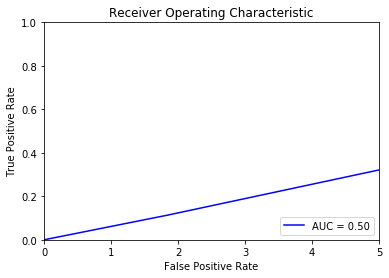

In [123]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob[:,1], pos_label=1, drop_intermediate=True)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
reg_per_img = (len(y_pred) - 49) / 205
fp = false_positive_rate * reg_per_img
plt.plot(fp, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.xlim([-0,5])
plt.ylim([-0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
# let's test performance on the initial data
x_test_all = X_all[y_all == 1]
y_test_all = y_all[y_all == 1]

print(f"Length of test data {len(X_all)}")
print(f"Number of masses in the test data {len(x_test_all)}")

predictions = clf.predict(x_test_all)
print(f"Detected percentage of masses {accuracy_score(y_test_all, predictions)}")

Length of test data 6376
Number of masses in the test data 110
Detected percentage of masses 0.8272727272727273


## Example of saving classifier to the disk and loading it back

Let's save our classifier

In [41]:
import pickle

# save the classifier
with open("./models/rf_classifier.pkl", "wb") as fid:
    pickle.dump(clf, fid)    

Now we will load classifier and test it again

In [46]:
# load it again
with open("./models/rf_classifier.pkl", "rb") as fid:
    rf_classifier_loaded = pickle.load(fid)
    
# let's test performance on the initial data
print(f"Length of test data {len(X_all)}")
print(f"Number of masses in the test data {len(x_test_all)}")

predictions_loaded = rf_classifier_loaded.predict(x_test_all)
print(f"Detected percentage of masses {accuracy_score(y_test_all, predictions_loaded)}")

Length of test data 4273
Number of masses in the test data 114
Detected percentage of masses 0.7719298245614035
